### PROBLEM STATEMENT
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Features:
 * Date - The date of the observation
 * type - Conventional or Organic
 * year - year
 * Total Volume - Total number of avocados sold
 * 4046 - Total number of avocados with PLU 4046 sold
 * 4225 - Total number of avocados with PLU 4225 sold
 * 4770 - Total number of avocados with PLU 4770 sold

#### Target:
The problem statement can been analysed as two different problems such as Regression and Classification problems.

#### For Regression :
Average Price - The Average price of a single avocado
#### For Classification target:
Region - the city or region of the observation

In [1]:
# 1. Importing necessary libraries
import pandas as pd  # 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# For Regression and Classification 
from sklearn.preprocessing import StandardScaler #standardization
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression #Regression
from sklearn.linear_model import LogisticRegression #Classification
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score # For 
 # For splitting the dataset into training and testing set
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, mean_squared_error, r2_score
 #Model Evaluation Metrics 

In [2]:
# To Load the dataset
df = pd.read_csv('avocado.csv')

In [3]:
df.shape

(18249, 14)

In [4]:
# Quick look at the data
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# To Check the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


* Few columns like 'Unnamed", "Date" are unnecessary, so they can be dropped

In [6]:
# To drop unwanted columns
df.drop(columns=["Unnamed: 0","Date"], inplace=True)

In [7]:
# Confirming 'Unnamed: 0' and 'Date' columns deleted
print(df.columns)
df.shape

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')


(18249, 12)

In [8]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [9]:
# To Check Dataset summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


* We have to treat some missing values in some features as observed from the summary.
* Also we can observe some outliers, which need to be treated.

In [10]:
# To Check the null values for proof
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
# To get unique features in column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

* From the data we have four years of data, we can use different years for analysis. we can divide our whole dataset into Organic and Conventional types.

In [13]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [14]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [15]:
# To get summary statistics of a specific column
print(df['region'].describe())

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object


### Data Vizualization

Text(0.5, 1.0, 'Average Price According to Region')

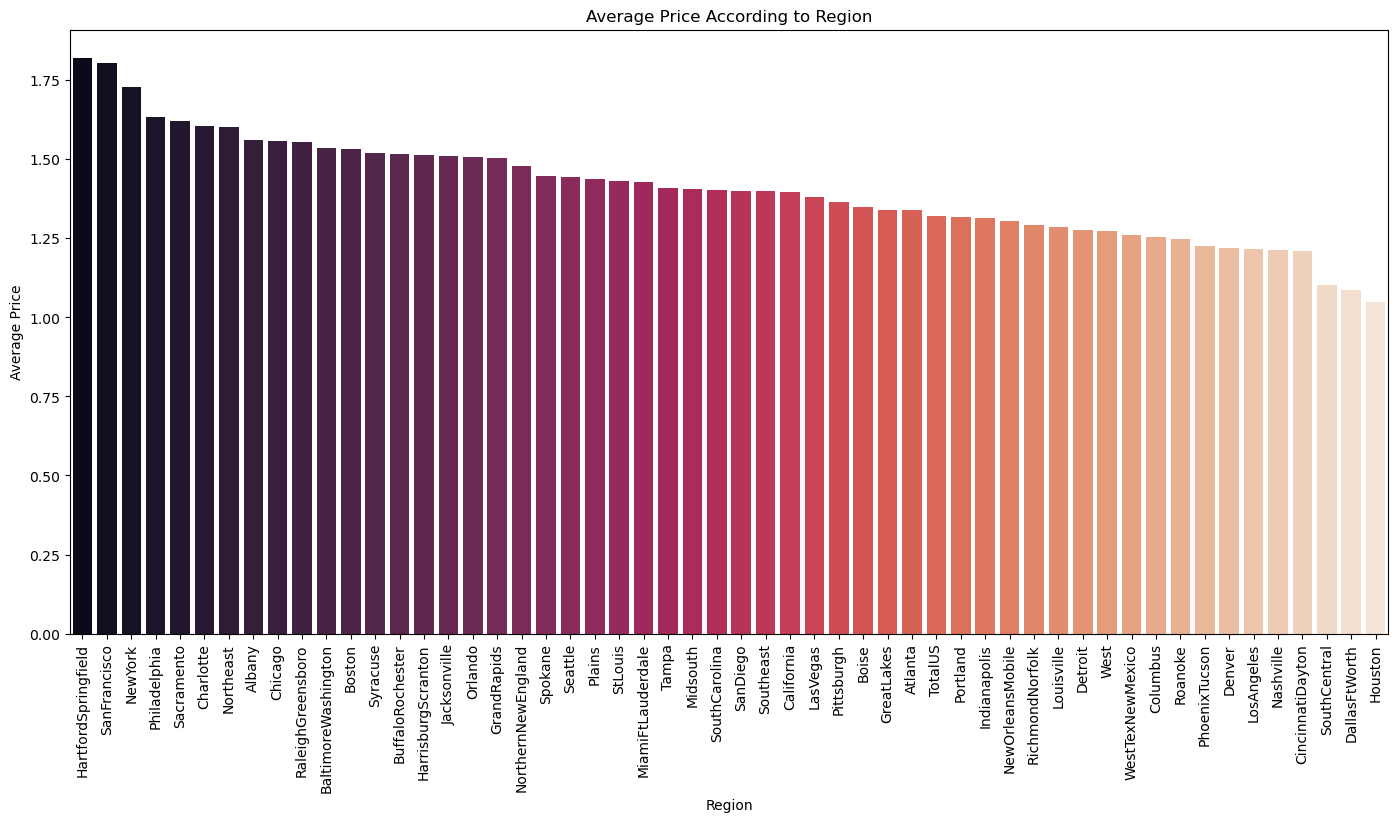

In [16]:
#import seaborn as sns
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

* This barplot shows the average price of avocado at various regions in a ascending order. Clearly Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

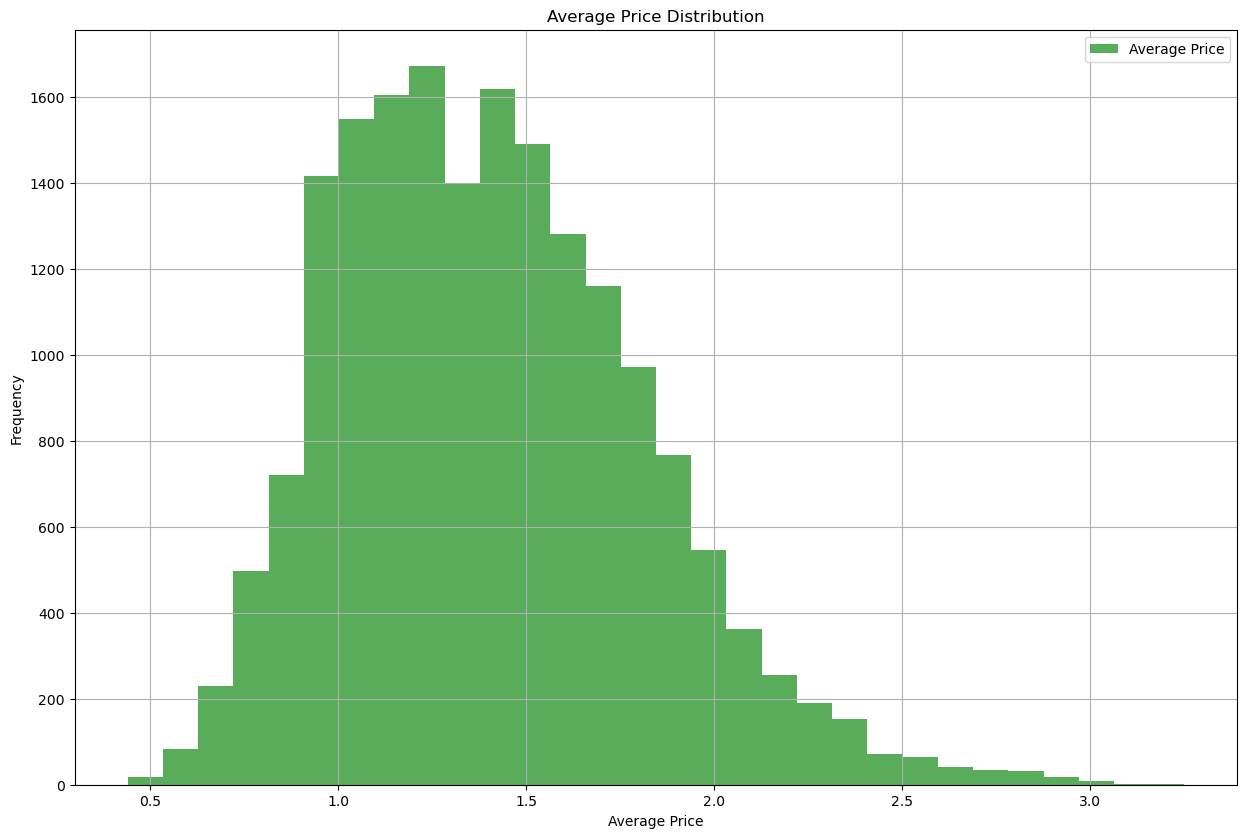

In [17]:
plt.figure(figsize=(15,10),dpi=100)
df["AveragePrice"].plot(kind="hist",color="green",bins=30,grid=True,alpha=0.65,label="Average Price")
plt.legend()
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

* The above histogram for the average price of avocado suggests that its distribution is somewhat positively skewed

<AxesSubplot:>

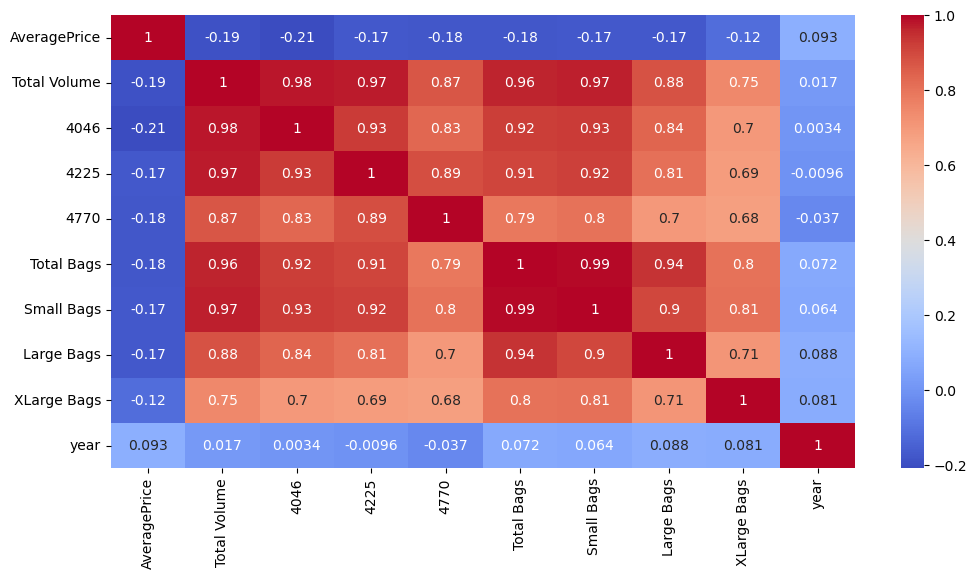

In [18]:
import numpy as np

corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

* From the above heatmap, we can see all the features are not correlated with the Average Price column, instead most of them are correlated with each other.

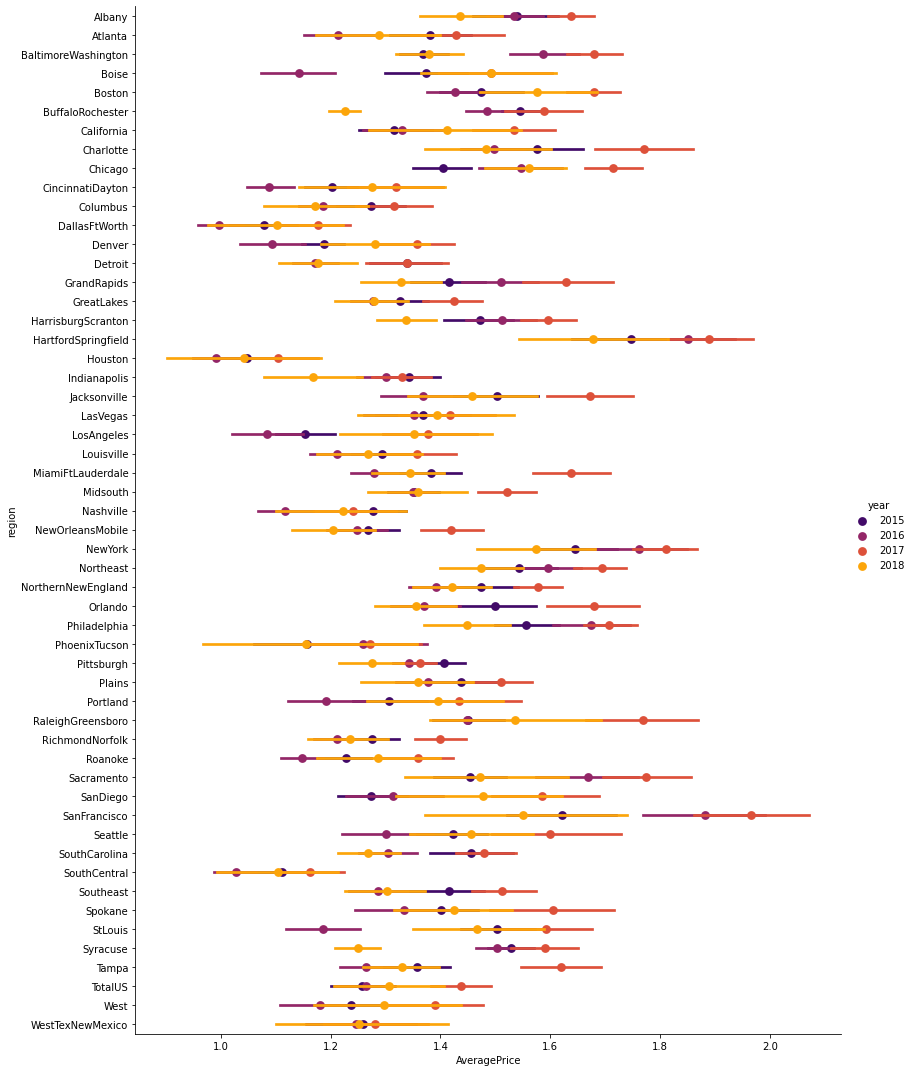

In [19]:
# To plot a factor plot of average avocado price for different regions classified by year
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='inferno',
                   join=False,
              )

### Data Preprocessing

* In this section, we handle missing values, date formatting, and one-hot encoding.

In [20]:
# Checking for missing values
print(df.isnull().sum())

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [21]:
df.duplicated().sum()

0

In [22]:
# Rename the columns of dataset
df.rename(columns ={'Total Volume':'Total_Volume','4046':'PLU_4046', '4225':'PLU_4225', '4770':'PLU_4770','Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags','XLarge Bags':'XLarge_Bags'},inplace=True)
df.head()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [23]:
# Label encode the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'type' column
df['type'] = le.fit_transform(df['type'])

# Fit and transform the 'region' column
df['region'] = le.fit_transform(df['region'])

df.head()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


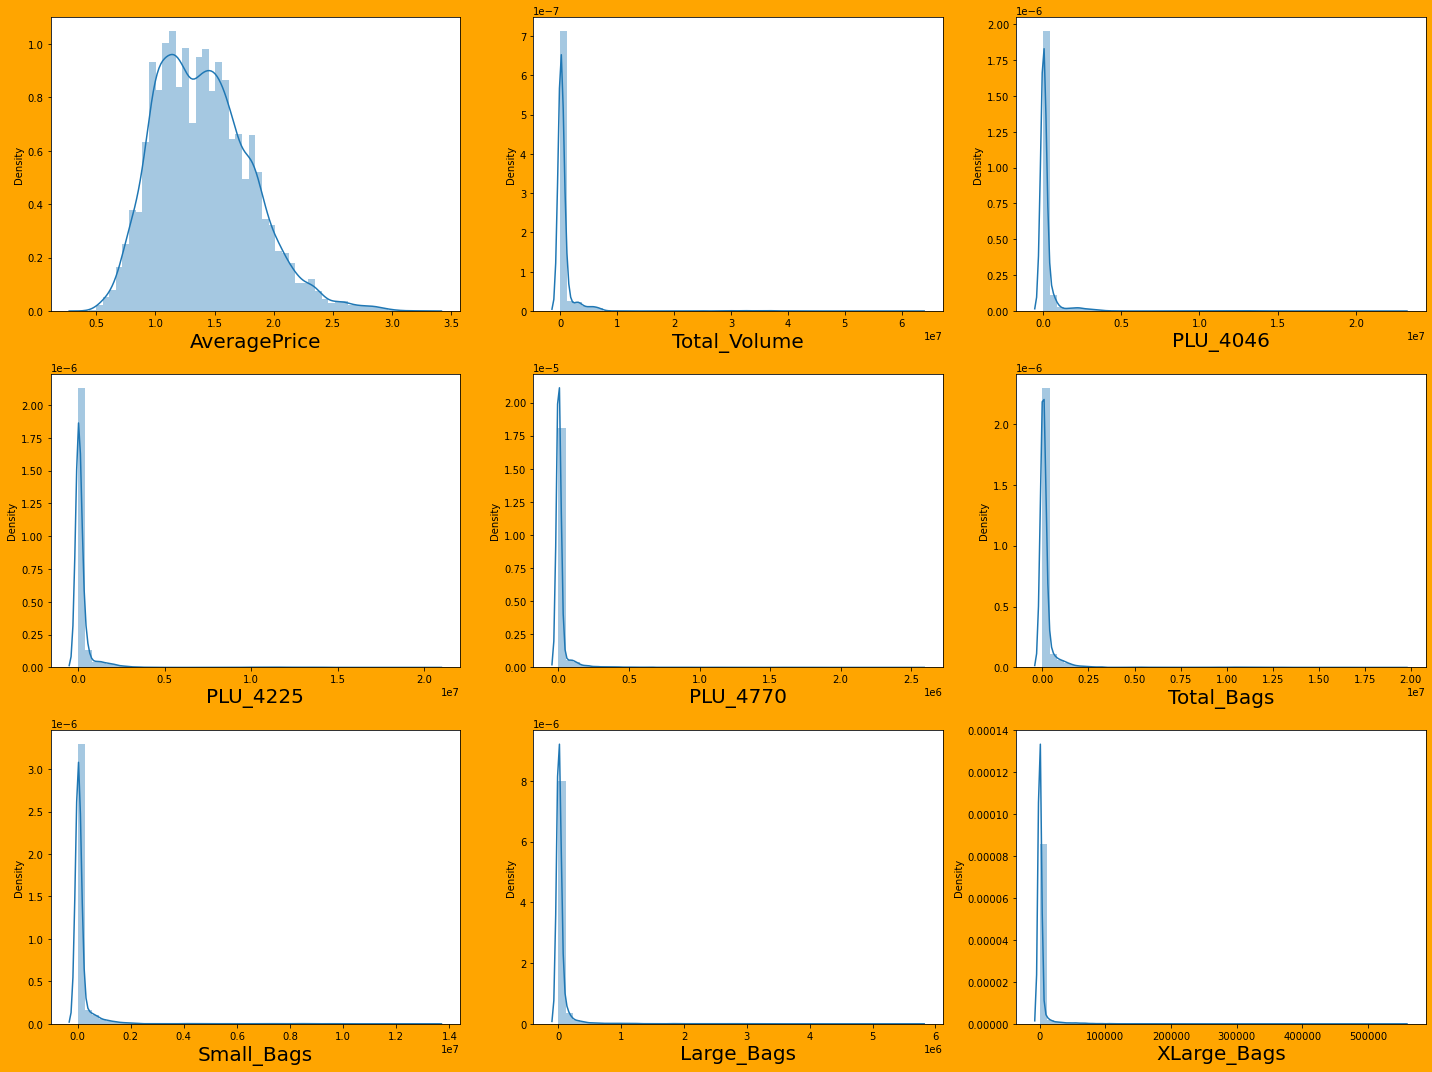

In [24]:
# Lets see in Distribution Plot
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

* There is 0 values in these features('AveragePrice', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770','Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags'). We have to remove that

In [25]:
df['Total_Volume'].mean()

850644.0130089332

In [26]:
df['PLU_4046'].mean()

293008.42453066056

In [27]:
df['PLU_4225'].mean()

295154.56835607596

In [28]:
df['PLU_4770'].mean()

22839.735992657315

In [29]:
df['Total_Bags'].mean()

239639.20205983953

In [30]:
df['Small_Bags'].mean()

182194.68669571026

In [31]:
df['Large_Bags'].mean()

54338.08814455636

In [32]:
df['XLarge_Bags'].mean()

3106.4265072058793

In [33]:
df['Total_Volume'].replace(to_replace=0.00,value=df['Total_Volume'].mean(),inplace=True)
df['PLU_4046'].replace(to_replace=0.00,value=df['PLU_4046'].mean(),inplace=True)
df['PLU_4225'].replace(to_replace=0.00,value=df['PLU_4225'].mean(),inplace=True)
df['PLU_4770'].replace(to_replace=0.00,value=df['PLU_4770'].mean(),inplace=True)
df['Total_Bags'].replace(to_replace=0.00,value=df['Total_Bags'].mean(),inplace=True)
df['Small_Bags'].replace(to_replace=0.00,value=df['Small_Bags'].mean(),inplace=True)
df['Large_Bags'].replace(to_replace=0.00,value=df['Large_Bags'].mean(),inplace=True)
df['XLarge_Bags'].replace(to_replace=0.00,value=df['XLarge_Bags'].mean(),inplace=True)

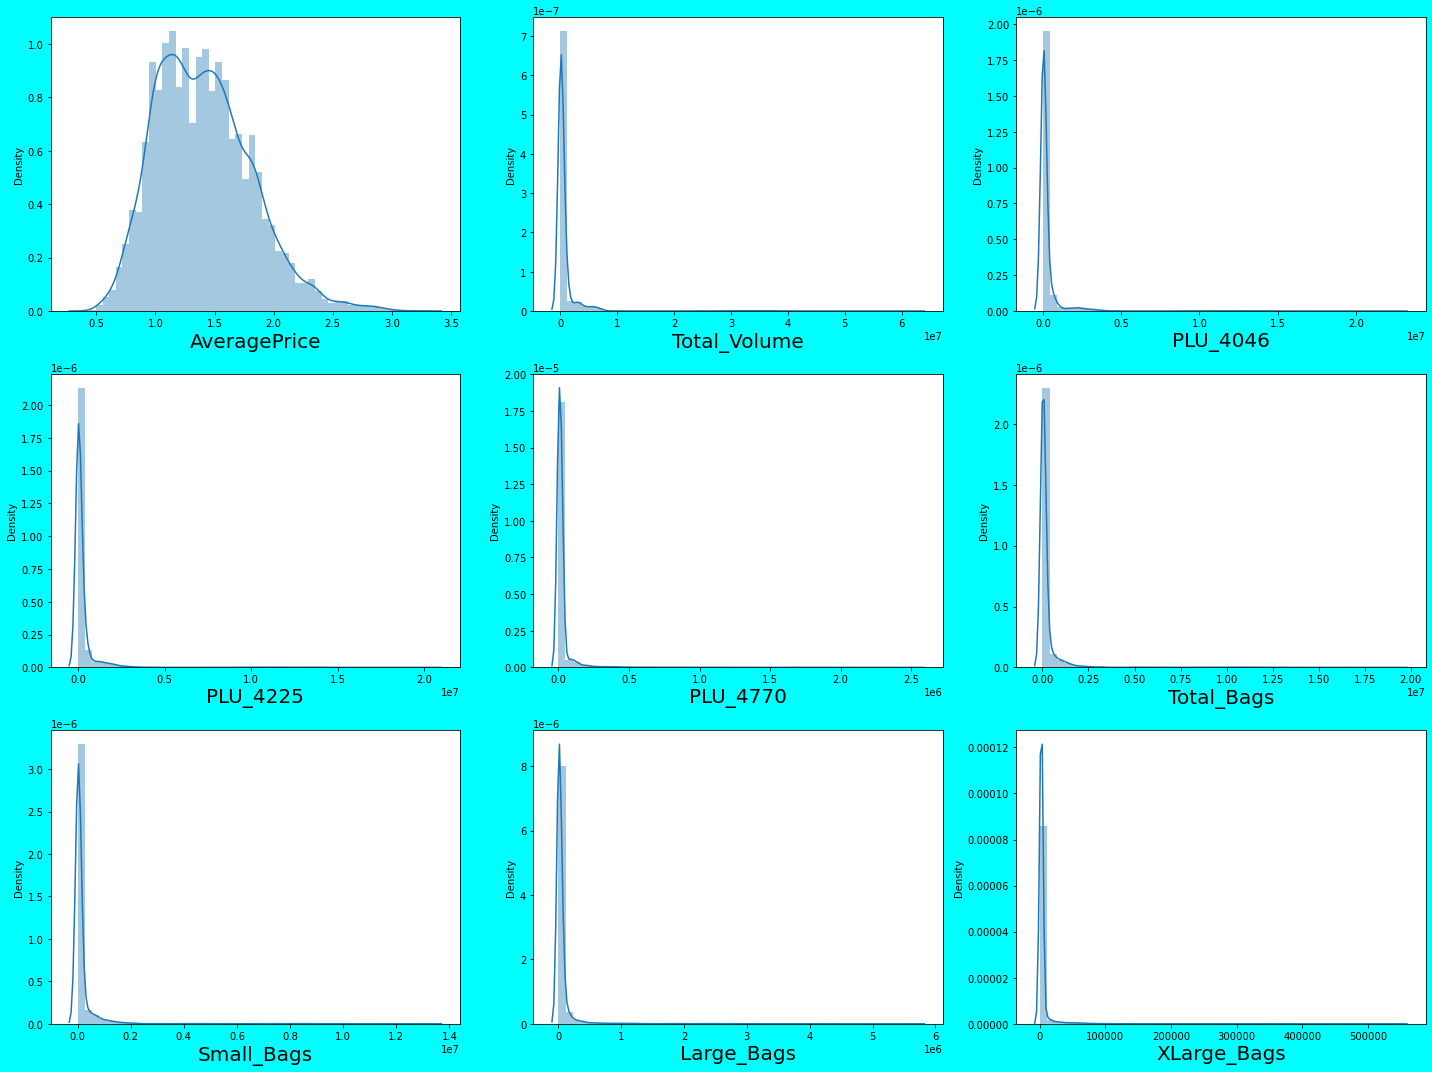

In [34]:
# Plot Again to see problems in dataset
plt.figure(figsize=(20,15),facecolor='cyan')
plotnumber = 1
for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [35]:
df.describe()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.971957e+04,2.398362e+05,1.837821e+05,6.139498e+04,5157.291024,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.065084e+05,9.862184e+05,7.459830e+05,2.430763e+05,17391.406970,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,3106.426507,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,3106.426507,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,2.283974e+04,1.112384e+05,8.620928e+04,5.433809e+04,3106.426507,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


* We have treated all missing values to their mean values

In [36]:
# Label encode the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'type' column
df['type'] = le.fit_transform(df['type'])

# Fit and transform the 'region' column
df['region'] = le.fit_transform(df['region'])

df.head()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0


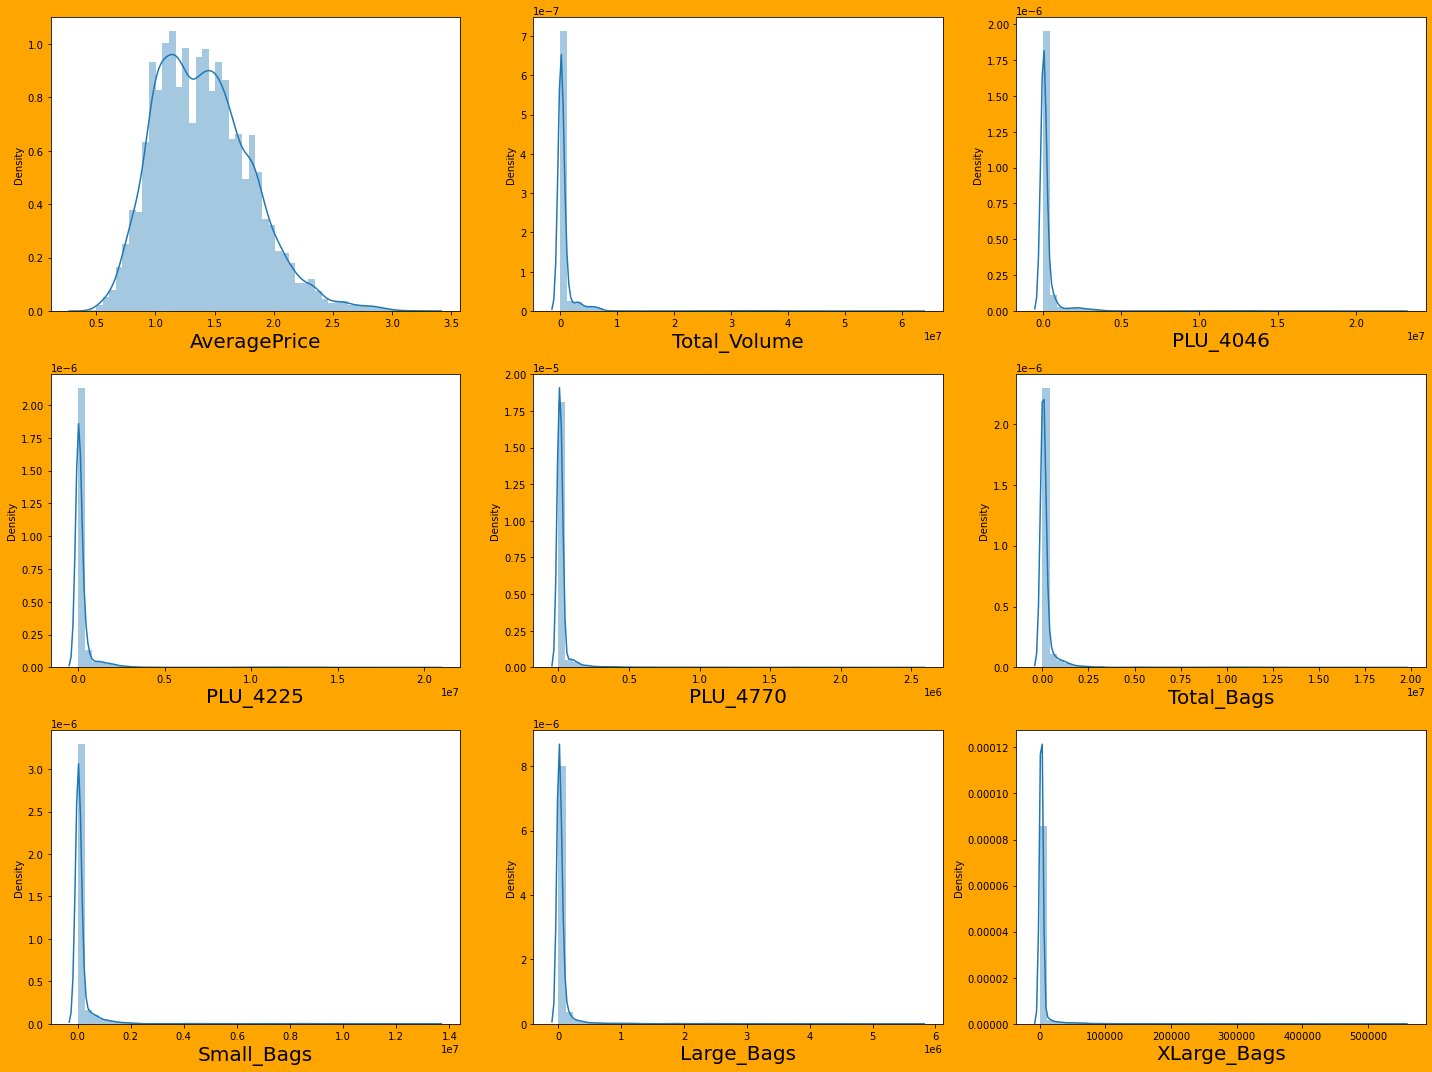

In [37]:
# Plot Again to see problems in dataset
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

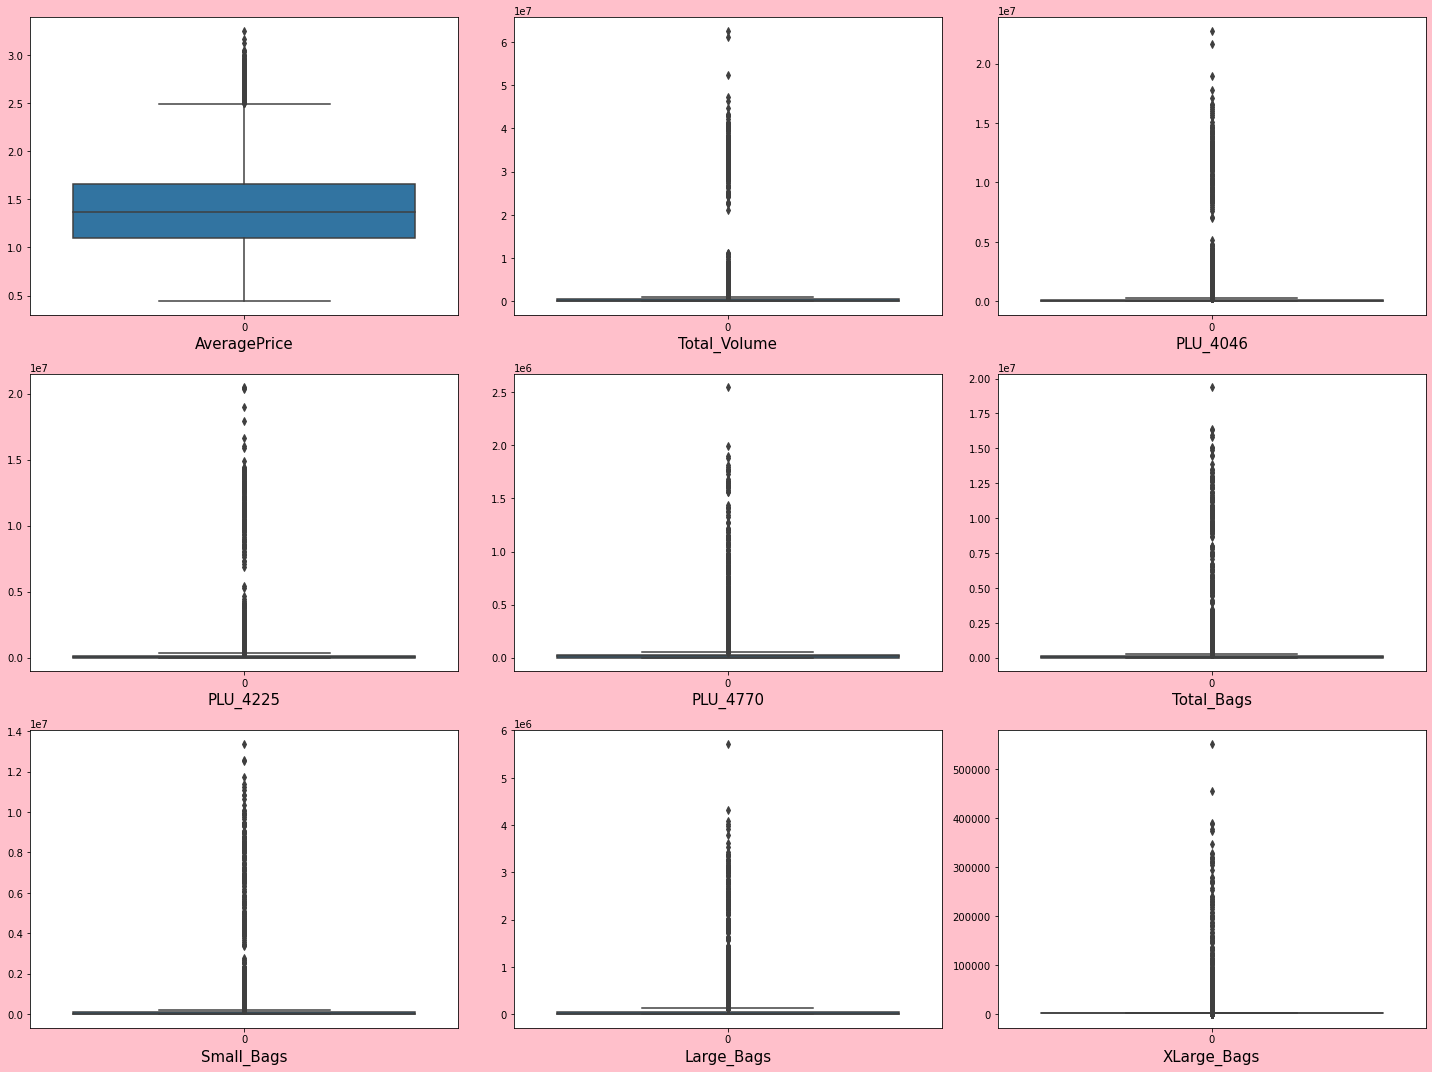

In [38]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1
for column in df:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

* The boxplot indicates that all the variables contains outliers. We have to treat outliers.

In [39]:
# To treat Outliers
#1st quantile
Q1=df.quantile(0.25)
#3rd quantile
Q3=df.quantile(0.75)
#IQR
IQR =Q3 - Q1

In [40]:
print(Q1)
print(Q3)
print(IQR)

AveragePrice        1.100000
Total_Volume    10838.580000
PLU_4046          975.090000
PLU_4225         3086.950000
PLU_4770          378.650000
Total_Bags       5108.010000
Small_Bags       3125.050000
Large_Bags        918.750000
XLarge_Bags      3106.426507
type                0.000000
year             2015.000000
region             13.000000
Name: 0.25, dtype: float64
AveragePrice         1.660000
Total_Volume    432962.290000
PLU_4046        121769.890000
PLU_4225        154258.390000
PLU_4770         22839.735993
Total_Bags      111238.440000
Small_Bags       86209.280000
Large_Bags       54338.088145
XLarge_Bags       3106.426507
type                 1.000000
year              2017.000000
region              40.000000
Name: 0.75, dtype: float64
AveragePrice         0.560000
Total_Volume    422123.710000
PLU_4046        120794.800000
PLU_4225        151171.440000
PLU_4770         22461.085993
Total_Bags      106130.430000
Small_Bags       83084.230000
Large_Bags       53419.33814

In [41]:
# To Validate Total Volume Outlier
T_Vol=Q3.Total_Volume +(1.5*IQR.Total_Volume)
index=np.where(df['Total_Volume'] > T_Vol)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(15952, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
15948,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
15949,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
15950,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [42]:
# To Validate PLU_4046 Outlier
PLU4046=Q3.PLU_4046 +(1.5*IQR.PLU_4046)
index=np.where(df['PLU_4046'] > PLU4046)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(15426, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15421,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
15422,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
15423,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
15424,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [43]:
# To Validate PLU_4225 Outlier
PLU4225=Q3.PLU_4225 +(1.5*IQR.PLU_4225)
index=np.where(df['PLU_4225'] > PLU4225)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(14824, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14820,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14821,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14822,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [44]:
# To Validate PLU_4770 Outlier
PLU4770=Q3.PLU_4770 +(1.5*IQR.PLU_4770)
index=np.where(df['PLU_4770'] > PLU4770)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(14702, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14697,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14698,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14699,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14700,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [45]:
# To Validate Total_Bags Outlier
T_Bags=Q3.Total_Bags +(1.5*IQR.Total_Bags)
index=np.where(df['PLU_4225'] > T_Bags)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(14223, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14218,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14219,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14220,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14221,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [46]:
# To Validate Small_Bags Outlier
S_Bags=Q3.Small_Bags +(1.5*IQR.Small_Bags)
index=np.where(df['Small_Bags'] > S_Bags)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(14008, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14003,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14004,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14005,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14006,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [47]:
# To Validate Large_Bags Outlier
L_Bags=Q3.Large_Bags +(1.5*IQR.Large_Bags)
index=np.where(df['Large_Bags'] > L_Bags)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(13842, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13837,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
13838,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
13839,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
13840,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [48]:
XL_Bags=Q3.XLarge_Bags +(1.5*IQR.XLarge_Bags)
index=np.where(df['XLarge_Bags'] > XL_Bags)
df=df.drop(df.index[index])
print(df.shape)
df.reset_index()

(13282, 12)


,index,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13277,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
13278,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
13279,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
13280,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


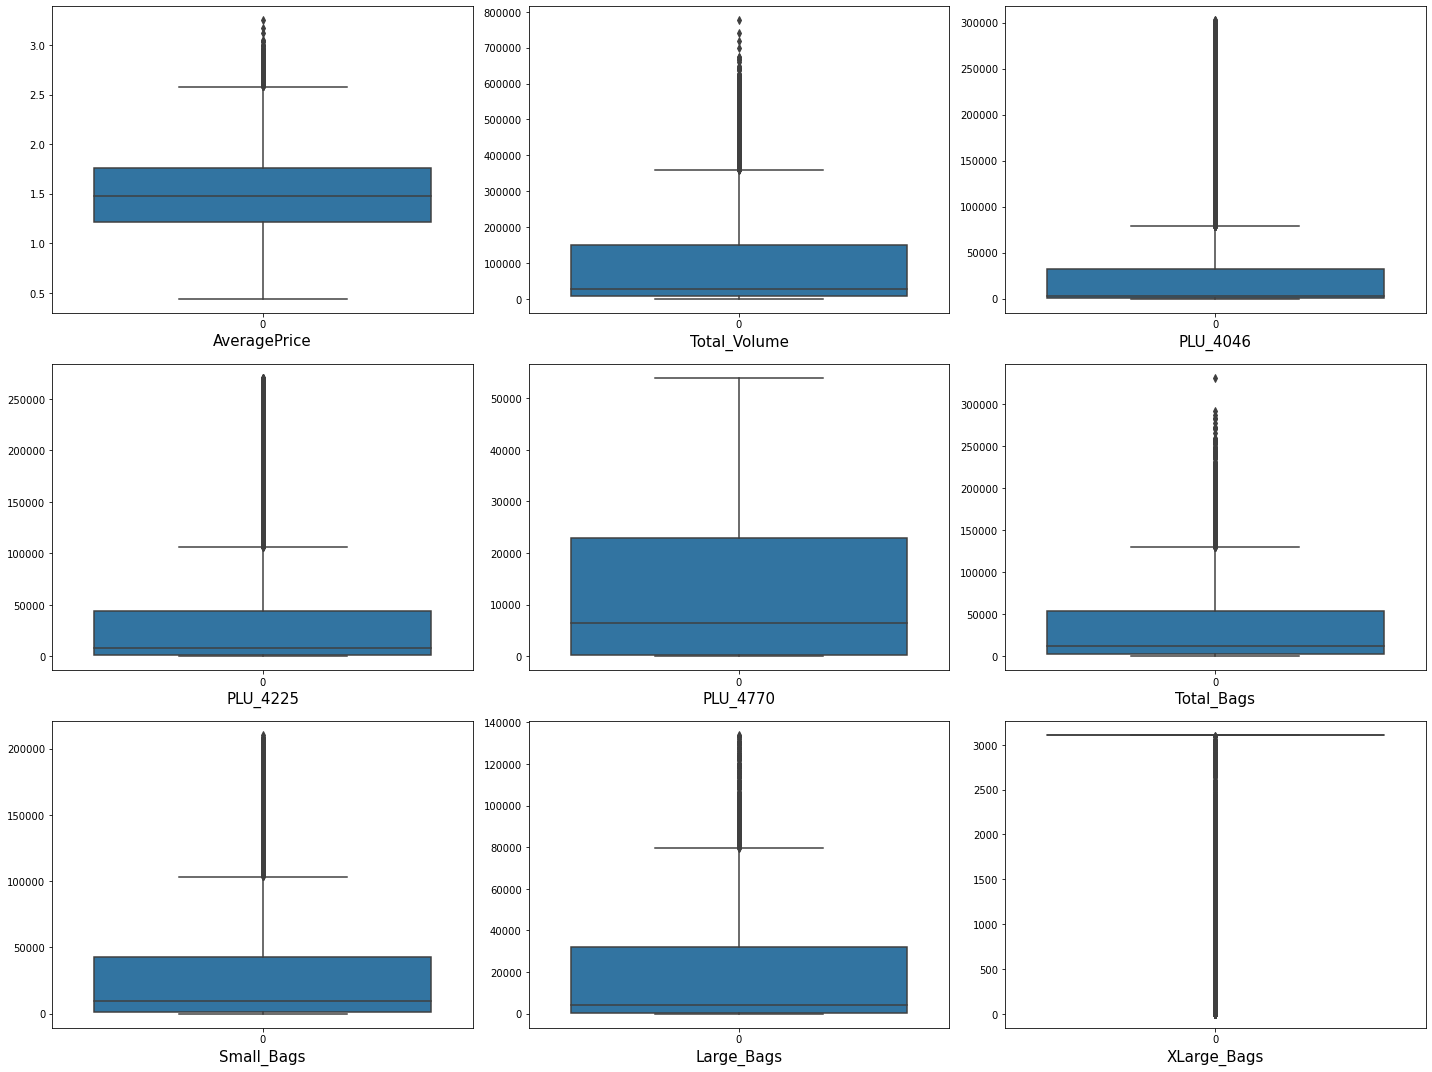

In [49]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [50]:
import numpy as np
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(df[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        df[j] = df[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

* We replaced the outliers higher than upper whisker by the value of the upper whisker and the outliers lower than the lower whisker by the value of the lower whisker

In [51]:
df.head(2)

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0


<AxesSubplot:>

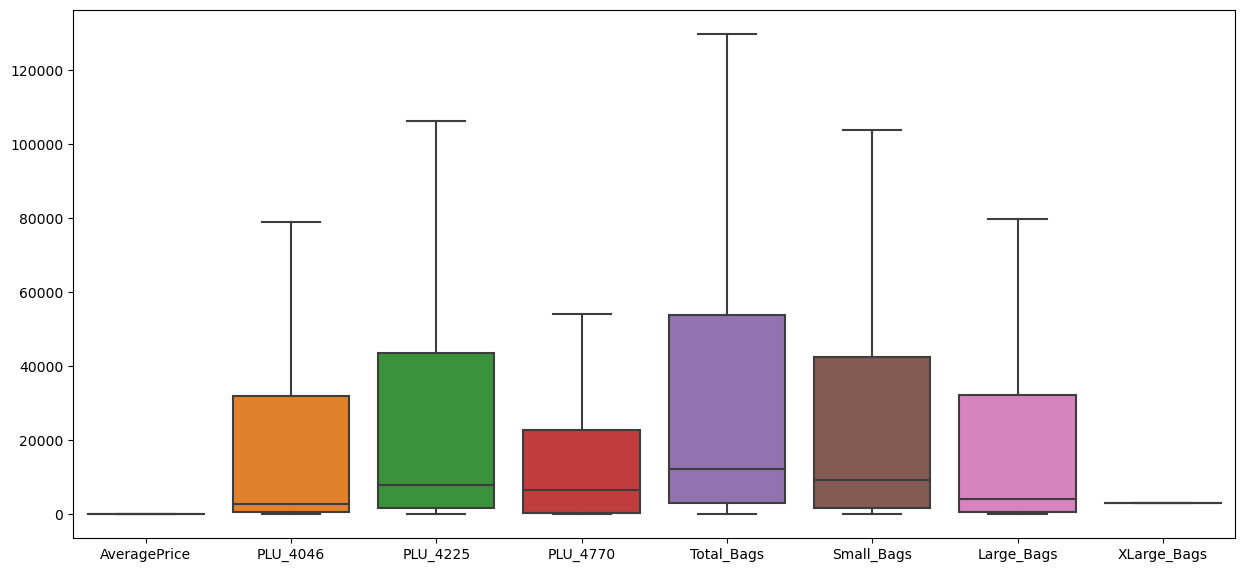

In [52]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df[[
 'AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags']])

* The data is free from outliers. now we can fit our data to appropriate models

<AxesSubplot:>

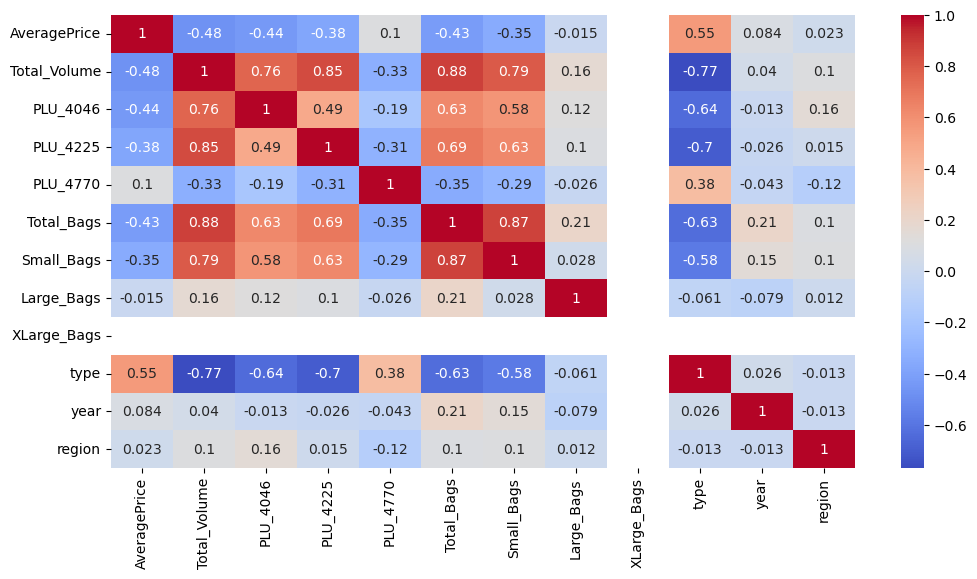

In [53]:
# Calculate the correlation matrix
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

* Correlation matrix shows Total volume and Total bags has high correlation around 0.88 so i will drop either one feature.

In [54]:
df.drop(columns=['Total_Bags'], inplace=True)

In [55]:
df.head(2)

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.426507,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.426507,0,2015,0


### Regression Model Training

In [56]:
# Splitting the data as Feature and target variable assign as x and y
X=df.drop(columns=['AveragePrice'],axis=1)
y=df[['AveragePrice']]

In [57]:
#Standard scaler for the standardized data

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [58]:
x_scaled.shape

(13282, 10)

In [59]:
#Split the dataset to training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=45)

In [60]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9961, 10)
(9961, 1)
(3321, 10)
(3321, 1)


In [61]:
#Linear regression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [62]:
#Predict the Average price give feature
df.tail(2)

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,3106.426507,1,2018,53
18248,1.62,17489.58,2894.77,2356.13,224.53,11988.14,26.01,3106.426507,1,2018,53


In [63]:
#Since we have already fit the scaler . you can tranform the data .
print("Average price: ",lr.predict(scaler.transform([[17489.58,2894.77,2356.13,224.53,11988.14,26.01,3106.426507,1,2018,53]])))

Average price:  [[1.7880214]]


In [64]:
lr.score(X_train,Y_train)

0.3443520715391969

In [65]:
lr.score(X_test,Y_test)

0.34860961573176874

In [66]:
Y_pred =(lr.predict(X_test))
Y_pred

array([[1.62823065],
       [1.65180545],
       [1.69955054],
       ...,
       [1.33007698],
       [1.1796508 ],
       [1.11392455]])

InvalidIndexError: (slice(None, None, None), None)

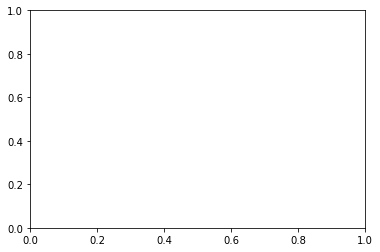

In [71]:
plt.plot(Y_test, Y_pred, marker='^',c='g',alpha=0.5)
plt.xlabel('Actual Average Price')
plt.ylabel('Predict Average Price')
plt.title('Actual vs Model Prediction')
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [73]:
# Mean Absolute error
mean_absolute_error(Y_test,Y_pred)

0.2396070709375005

In [74]:
# Mean Squared error
mean_squared_error(Y_test,Y_pred)

0.09501700870167362

In [75]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.3082482906711303

In [76]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [77]:
#LassoCV will return best alpha after max iteration
#Normalize is subtracting the mean and divide by L2_norm

lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(X_train,Y_train)

LassoCV(max_iter=100)

In [78]:
#best alpha paremeter
alpha=lasscv.alpha_
alpha

0.00021340565150822677

In [79]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.00021340565150822677)

In [80]:
lasso_reg.score(X_test,Y_test)

0.34852320917529356

In [81]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train,Y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [82]:
ridgecv.alpha_

0.09099999999999998

In [83]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,Y_train)

Ridge(alpha=0.09099999999999998)

In [84]:
ridge_model.score(X_test,Y_test)

0.3486094523693447

* For Regression Problem the model is not overfitted it is proved from regularization method.

### Classification Problem

In [85]:
#Splitting the dataset for training and testing set
x = df.drop(columns=['region'],axis=1)
y = df['region']

In [86]:
# Standardization
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [87]:
x_scaled.shape

(13282, 10)

In [88]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [89]:
x_train.shape

(9961, 10)

In [90]:
y_test.shape

(3321,)

In [91]:
# Train model on logistic regression
clf = LogisticRegression()

In [92]:
clf.fit(x_train,y_train)

LogisticRegression()

In [93]:
# Predict the test set
y_pred=clf.predict(x_test)
y_pred

array([ 3, 20, 18, ..., 44,  3, 45], dtype=int64)

In [94]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.40138512496236073

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=clf.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report",classification_report(y_test,pred))

In [96]:
# To check training and testing score
metrics_score(clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(clf,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   41.26091757855637
=================Test Score======================
Accuracy Score==>   40.138512496236075
Classification Report               precision    recall  f1-score   support

           0       0.41      0.69      0.51        91
           1       0.40      0.15      0.22        54
           2       0.17      0.33      0.22        33
           3       0.21      0.59      0.31        91
           4       0.81      0.50      0.62        42
           5       0.63      0.30      0.40        91
           6       0.77      0.62      0.69        37
           7       0.62      0.24      0.35        75
           8       0.80      0.92      0.86        36
           9       0.44      0.56      0.49        77
          10       0.38      0.17      0.24        80
          11       0.60      0.27      0.37        44
          12       0.58      0.71      0.64        51
          13       0.10      0.13      0.1

* For the Regression problem training accuracy around 34% and testing accuracy with 34% with low error metrics that the model is not overfitted which is proved with regularisation method.
* For the Classification Problem training accuracy around 41% and testing accuracy with 40% which is proved with Classification metrics that the model is not overfitted.